In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import SGD
import tensorflow.keras.preprocessing.image as tf_image

In [2]:
def load_board_img(img_name):
    img = tf_image.load_img(img_name, target_size=(28, 28))
  
    x = tf_image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    img_array = np.vstack([x])
    img_gray = tf.image.rgb_to_grayscale(img_array)
    img_gray = 1.0 - (img_gray / 255.0)
    
    num = int(img_name.split('/')[-1].split('_')[0][1])
    one_hot = np.zeros((1, 9), dtype=int)
    one_hot[:, num-1] = 1
    
    return img_gray.numpy(), one_hot

# Training and test

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Remove 0, not needed for sudoku.

In [5]:
idxs_1_9_train = np.where(y_train != 0)[0]
idxs_1_9_test = np.where(y_test != 0)[0]
x_train = x_train[idxs_1_9_train]
y_train = y_train[idxs_1_9_train]
x_test = x_test[idxs_1_9_test]
y_test = y_test[idxs_1_9_test]

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(54077, 28, 28)
(54077,)
(9020, 28, 28)
(9020,)


In [7]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10, dtype=int)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10, dtype=int)

In [8]:
y_test = y_test[:, 1:]
y_train = y_train[:, 1:]

In [9]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [14]:
import glob
from random import shuffle

new_train = []
new_test = []
for i in range(1, 10):
    nd = glob.glob('imgs_from_board/' + str(i) + '/*.jpg')
    shuffle(nd)
    new_test.extend(nd[:14])
    new_train.extend(nd[14:])

In [15]:
for train_img in new_train:
    new_img, img_num = load_board_img(train_img)
    x_train = np.append(x_train, new_img, axis=0)
    y_train = np.append(y_train, img_num, axis=0)
    
for test_img in new_test:
    new_img, img_num = load_board_img(test_img)
    x_test = np.append(x_test, new_img, axis=0)
    y_test = np.append(y_test, img_num, axis=0)

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu, kernel_initializer='he_uniform',
                                 input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu, kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(9, activation=tf.nn.softmax))

In [23]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(x=x_train, y=y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1715/1715 [==============================] - 10s 6ms/step - loss: 0.1783 - accuracy: 0.9441 - val_loss: 0.0727 - val_accuracy: 0.9758
Epoch 2/10
1715/1715 [==============================] - 10s 6ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.0512 - val_accuracy: 0.9833
Epoch 3/10
1715/1715 [==============================] - 10s 6ms/step - loss: 0.0340 - accuracy: 0.9896 - val_loss: 0.0576 - val_accuracy: 0.9826
Epoch 4/10
1715/1715 [==============================] - 10s 6ms/step - loss: 0.0210 - accuracy: 0.9941 - val_loss: 0.0488 - val_accuracy: 0.9843
Epoch 5/10
1715/1715 [==============================] - 10s 6ms/step - loss: 0.0130 - accuracy: 0.9961 - val_loss: 0.0462 - val_accuracy: 0.9858
Epoch 6/10
1715/1715 [==============================] - 10s 6ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.0442 - val_accuracy: 0.9859
Epoch 7/10
1715/1715 [==============================] - 10s 6ms/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.0546 - val_ac

In [25]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
print("\nTest accuracy: {:.4f}".format(test_acc))

286/286 [==============================] - 1s 2ms/step - loss: 0.0469 - accuracy: 0.9875

Test accuracy: 0.9875


Text(0.5, 1.0, 'Training and validation loss')

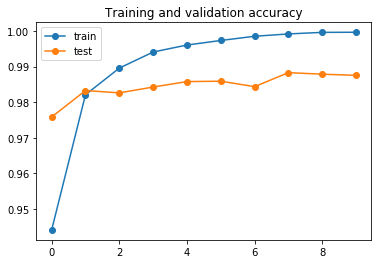

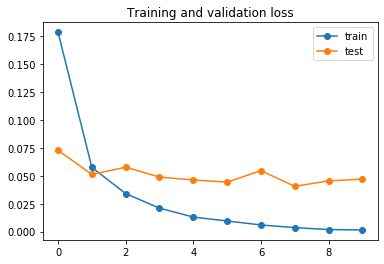

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, '-o', label='train')
plt.plot(epochs, val_acc, '-o', label='test')
plt.legend(loc=0)
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss, '-o', label='train')
plt.plot(epochs, val_loss, '-o', label='test')
plt.legend(loc=0)
plt.title('Training and validation loss')

In [27]:
predictions = np.argmax(model.predict(x_test), axis=-1) + 1

In [28]:
i = 0
for pred, real in zip(predictions, np.argmax(y_test, axis=-1) + 1):
    if pred != real:
        i += 1
        print('Wrong prediction ({}): real {}, pred {}'.format(i, real, pred))

Wrong prediction (1): real 9, pred 5
Wrong prediction (2): real 2, pred 7
Wrong prediction (3): real 5, pred 3
Wrong prediction (4): real 8, pred 2
Wrong prediction (5): real 2, pred 7
Wrong prediction (6): real 2, pred 6
Wrong prediction (7): real 2, pred 1
Wrong prediction (8): real 8, pred 7
Wrong prediction (9): real 3, pred 5
Wrong prediction (10): real 1, pred 3
Wrong prediction (11): real 6, pred 5
Wrong prediction (12): real 7, pred 2
Wrong prediction (13): real 6, pred 8
Wrong prediction (14): real 4, pred 6
Wrong prediction (15): real 6, pred 5
Wrong prediction (16): real 7, pred 2
Wrong prediction (17): real 9, pred 4
Wrong prediction (18): real 4, pred 9
Wrong prediction (19): real 9, pred 5
Wrong prediction (20): real 7, pred 1
Wrong prediction (21): real 8, pred 2
Wrong prediction (22): real 5, pred 3
Wrong prediction (23): real 9, pred 7
Wrong prediction (24): real 7, pred 9
Wrong prediction (25): real 1, pred 3
Wrong prediction (26): real 8, pred 7
Wrong prediction (27)

In [29]:
model.save('num_predict')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: num_predict/assets


# Load and test model

In [30]:
reconstructed_model = tf.keras.models.load_model('num_predict')

In [31]:
np.testing.assert_allclose(model.predict(x_test), reconstructed_model.predict(x_test))

3

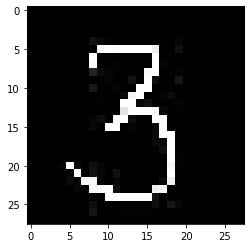

In [32]:
img = tf_image.load_img('tmp_img.jpg', target_size=(28, 28))
  
x = tf_image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_array = np.vstack([x])
img_gray = tf.image.rgb_to_grayscale(img_array)
img_gray = 1.0 - (img_gray / 255.0)

plt.imshow(img_gray.numpy()[0, :, :, 0], cmap='gray', vmin=0, vmax=1)

p = reconstructed_model.predict(img_gray)
np.argmax(p) + 1

# Create grid

In [33]:
import sys
from PyQt5.QtWidgets import QApplication, QLabel, QWidget, QHBoxLayout
from PyQt5.QtGui import QPainter, QPainterPath, QPen, QPixmap, QRegion, QFont
from PyQt5 import QtCore
from PyQt5.QtCore import Qt, QPoint

In [34]:
W = 56
H = 56
smallBorder = 2
largeBorder = 4
nRows = 9
nCols = 9
savedImage = 'tmp_img.jpg'

In [35]:
class NumberBox(QLabel):
    
    def __init__(self, x, y, parent=None):
        super().__init__(parent)
        self.setStyleSheet('background-color: white;'
                           'border: 0px;')
        self.setGeometry(x, y, W, H)
        self.setFixedSize(W, H)
        
        self.path = QPainterPath()
        self.drawing = False
        self.number = ''
        
    def saveImage(self, fileName):
        pix = QPixmap(W, H)
        self.render(pix)
        pix.save(fileName)
        
    def clearImage(self):
        self.path = QPainterPath()
        self.update()
        
    def paintEvent(self, event):
        painter = QPainter(self)
        painter.setPen(QPen(Qt.black, 2, Qt.SolidLine))
        if self.drawing:
            painter.drawPath(self.path)
        else:
            font = QFont()
            font.setPointSize(W // 2)
            painter.setFont(font)
            painter.drawText(W // 4, H // 4, W // 2, H // 2, QtCore.Qt.AlignCenter, self.number)

    def mousePressEvent(self, event):
        if event.button() == Qt.LeftButton:
            self.drawing = True
            self.path.moveTo(event.pos())
            self.update()

    def mouseMoveEvent(self, event):
        if event.buttons() and Qt.LeftButton and self.drawing:
            self.path.lineTo(event.pos())
            self.update()

    def mouseReleaseEvent(self, event):
        if event.button() == Qt.LeftButton:
            self.saveImage(savedImage)
            self.classifyNumber()
            self.clearImage()
            self.drawing = False
            self.update()
            
    def classifyNumber(self):
        img = tf_image.load_img(savedImage, target_size=(W // 2, H // 2))
  
        x = tf_image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        img_array = np.vstack([x])
        img_gray = tf.image.rgb_to_grayscale(img_array)
        img_gray = 1.0 - (img_gray / 255.0)

        p = reconstructed_model.predict(img_gray)
        self.number = str(np.argmax(p) + 1)

In [36]:
class Board(QWidget):
    
    def __init__(self):
        super().__init__()
        
        self.h = 6 * smallBorder + 4 * largeBorder + 9 * H
        self.w = 6 * smallBorder + 4 * largeBorder + 9 * H
        self.setFixedSize(self.w, self.h)
        self.setStyleSheet('QLabel { background-color : black; }')
        self.setWindowTitle('PySudoku')
        
        boxes = []
        yPos = largeBorder
        for row in range(nRows):
            xPos = largeBorder
            if row > 0:
                if row % 3 == 0:
                    yPos += H + largeBorder
                else:
                    yPos += H + smallBorder
                    
            for col in range(nCols):
                if col > 0:
                    if col % 3 == 0:
                        xPos += W + largeBorder
                    else:
                        xPos += W + smallBorder
                
                boxes.append(NumberBox(xPos, yPos, self))
                
        self.drawBorder()
        self.drawInnerLargeLines()
        self.drawInnerSmallLines()

    def drawBorder(self):
        left = QLabel(self)
        left.setGeometry(0, 0, largeBorder, self.h)
        up = QLabel(self)
        up.setGeometry(0, 0, self.w, largeBorder)
        right = QLabel(self)
        right.setGeometry(self.w - largeBorder, 0, largeBorder, self.h)
        down = QLabel(self)
        down.setGeometry(0, self.h - largeBorder, self.w, largeBorder)
        
    def drawInnerLargeLines(self):
        l1 = QLabel(self)
        l1.setGeometry(largeBorder + 2 * smallBorder + 3 * W, 0, largeBorder, self.h)
        l2 = QLabel(self)
        l2.setGeometry(2 * largeBorder + 4 * smallBorder + 6 * W, 0, largeBorder, self.h)
        l3 = QLabel(self)
        l3.setGeometry(0, largeBorder + 2 * smallBorder + 3 * H, self.w, largeBorder)
        l4 = QLabel(self)
        l4.setGeometry(0, 2 * largeBorder + 4 * smallBorder + 6 * H, self.w, largeBorder)
        
    def drawInnerSmallLines(self):
        s1 = QLabel(self)
        s1.setGeometry(largeBorder + W, 0, smallBorder, self.h)
        s2 = QLabel(self)
        s2.setGeometry(largeBorder + smallBorder + 2 * W, 0, smallBorder, self.h)
        s3 = QLabel(self)
        s3.setGeometry(2 * largeBorder + 2 * smallBorder + 4 * W, 0, smallBorder, self.h)
        s4 = QLabel(self)
        s4.setGeometry(2 * largeBorder + 3 * smallBorder + 5 * W, 0, smallBorder, self.h)
        s5 = QLabel(self)
        s5.setGeometry(3 * largeBorder + 4 * smallBorder + 7 * W, 0, smallBorder, self.h)
        s6 = QLabel(self)
        s6.setGeometry(3 * largeBorder + 5 * smallBorder + 8 * W, 0, smallBorder, self.h)
        s1 = QLabel(self)
        s1.setGeometry(0, largeBorder + H, self.w, smallBorder)
        s2 = QLabel(self)
        s2.setGeometry(0, largeBorder + smallBorder + 2 * H, self.w, smallBorder)
        s3 = QLabel(self)
        s3.setGeometry(0, 2 * largeBorder + 2 * smallBorder + 4 * H, self.w, smallBorder)
        s4 = QLabel(self)
        s4.setGeometry(0, 2 * largeBorder + 3 * smallBorder + 5 * H, self.w, smallBorder)
        s5 = QLabel(self)
        s5.setGeometry(0, 3 * largeBorder + 4 * smallBorder + 7 * H, self.w, smallBorder)
        s6 = QLabel(self)
        s6.setGeometry(0, 3 * largeBorder + 5 * smallBorder + 8 * H, self.w, smallBorder)

In [37]:
if __name__ == '__main__':
    app = QtCore.QCoreApplication.instance()
    if app is None:
        app = QApplication(sys.argv)

    mw = Board()
    mw.show()

    app.exec_()